In [1]:
import pynucastro as pyna

In [2]:
reaclib_lib = pyna.ReacLibLibrary()

In [3]:
original_nuclei = ["p",
                   "he4", "c12", "o16", "ne20", "mg24", "si28", "s32",
                   "ar36", "ca40", "ti44", "cr48", "fe52", "ni56",
                   "al27", "p31", "cl35", "k39", "sc43", "v47", "mn51", "co55",
                   "n13", "n14", "f18", "ne21", "na22", "na23"]

In [4]:
subch_orig = reaclib_lib.linking_nuclei(original_nuclei)

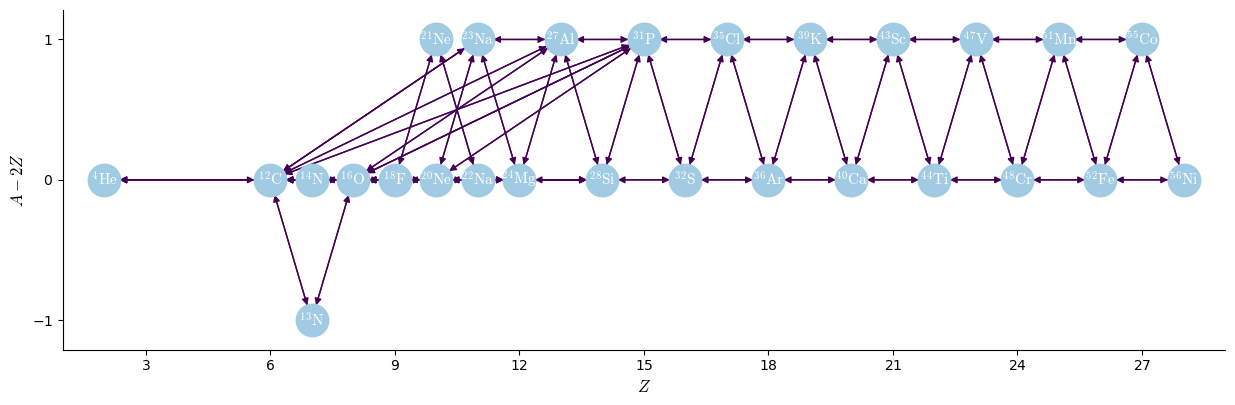

In [5]:
rc_orig = pyna.RateCollection(libraries=[subch_orig])
rc_orig.plot(rotated=True, hide_xalpha=True, size=(1500, 450), node_size=500, node_font_size=11)

In [6]:
print(subch_orig)

he4 + he4 + he4 --> c12        [Q =   7.28 MeV] (he4 + he4 + he4 --> c12 <fy05_reaclib__>)
c12 + p --> n13                [Q =   1.94 MeV] (c12 + p --> n13 <ls09_reaclib__>)
c12 + he4 --> o16              [Q =   7.16 MeV] (c12 + he4 --> o16 <nac2_reaclib__>)
c12 + c12 --> he4 + ne20       [Q =   4.62 MeV] (c12 + c12 --> he4 + ne20 <cf88_reaclib__>)
c12 + c12 --> p + na23         [Q =   2.24 MeV] (c12 + c12 --> p + na23 <cf88_reaclib__>)
n13 + he4 --> p + o16          [Q =   5.22 MeV] (n13 + he4 --> p + o16 <cf88_reaclib__>)
n14 + he4 --> f18              [Q =   4.41 MeV] (n14 + he4 --> f18 <il10_reaclib__>)
o16 + he4 --> ne20             [Q =   4.73 MeV] (o16 + he4 --> ne20 <co10_reaclib__>)
o16 + c12 --> he4 + mg24       [Q =   6.77 MeV] (o16 + c12 --> he4 + mg24 <cf88_reaclib__>)
o16 + c12 --> p + al27         [Q =   5.17 MeV] (o16 + c12 --> p + al27 <cf88_reaclib__>)
o16 + o16 --> he4 + si28       [Q =   9.59 MeV] (o16 + o16 --> he4 + si28 <cf88_reaclib__>)
o16 + o16 --> p + p31    

## add in some missing C+C, C+O, and O+O rates

These rates involve neutron captures, but the neutron capture itself is very fast, so we will modify the rate's endpoint assuming that the neutron capture is instantaneous.

In [7]:
# in this list, we'll have actual reactants, actual products, and modified products
other_rates = [(("c12", "c12"), ("mg23", "n"), ("mg24")),
               (("o16", "o16"), ("s31", "n"), ("s32")),
               (("c12", "o16"), ("si27", "n"), ("si28"))]

# these are the "missing links" -- not used, but putting here for posterity
left_out = [(("mg23", "n"), ("mg24")),
            (("s31", "n"), ("s32")),
            (("si27", "n"), ("si28"))]


In [8]:
for r, p, mp in other_rates:
    rfilter = pyna.rates.RateFilter(reactants=r, products=p)
    _library = reaclib_lib.filter(rfilter)
    r = _library.get_rates()[0]
    r.modify_products(mp)
    print(r)
    subch_orig += _library

c12 + c12 --> mg24
o16 + o16 --> s32
o16 + c12 --> si28


In [9]:
print(subch_orig)

he4 + he4 + he4 --> c12        [Q =   7.28 MeV] (he4 + he4 + he4 --> c12 <fy05_reaclib__>)
c12 + p --> n13                [Q =   1.94 MeV] (c12 + p --> n13 <ls09_reaclib__>)
c12 + he4 --> o16              [Q =   7.16 MeV] (c12 + he4 --> o16 <nac2_reaclib__>)
c12 + c12 --> he4 + ne20       [Q =   4.62 MeV] (c12 + c12 --> he4 + ne20 <cf88_reaclib__>)
c12 + c12 --> p + na23         [Q =   2.24 MeV] (c12 + c12 --> p + na23 <cf88_reaclib__>)
n13 + he4 --> p + o16          [Q =   5.22 MeV] (n13 + he4 --> p + o16 <cf88_reaclib__>)
n14 + he4 --> f18              [Q =   4.41 MeV] (n14 + he4 --> f18 <il10_reaclib__>)
o16 + he4 --> ne20             [Q =   4.73 MeV] (o16 + he4 --> ne20 <co10_reaclib__>)
o16 + c12 --> he4 + mg24       [Q =   6.77 MeV] (o16 + c12 --> he4 + mg24 <cf88_reaclib__>)
o16 + c12 --> p + al27         [Q =   5.17 MeV] (o16 + c12 --> p + al27 <cf88_reaclib__>)
o16 + o16 --> he4 + si28       [Q =   9.59 MeV] (o16 + o16 --> he4 + si28 <cf88_reaclib__>)
o16 + o16 --> p + p31    

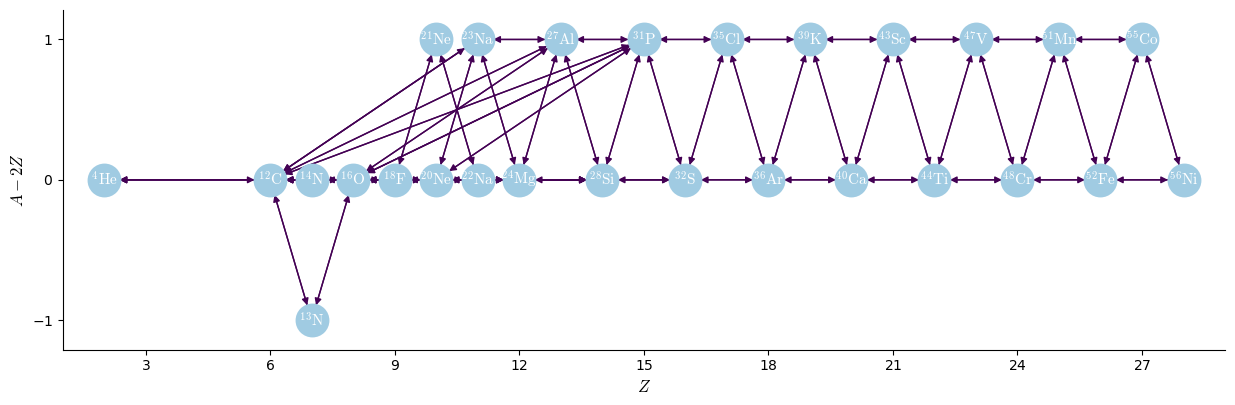

In [10]:
rc_orig = pyna.RateCollection(libraries=[subch_orig])
rc_orig.plot(rotated=True, hide_xalpha=True, size=(1500, 450), node_size=500, node_font_size=11)

In [11]:
print(len(rc_orig.unique_nuclei), len(rc_orig.rates))

28 107


In [12]:
print(rc_orig.rate_pair_overview())

p
     forward: c12 + p --> n13 ; reverse: n13 --> p + c12
     forward: c12 + c12 --> p + na23 ; reverse: na23 + p --> c12 + c12
     forward: n13 + he4 --> p + o16 ; reverse: o16 + p --> he4 + n13
     forward: o16 + c12 --> p + al27 ; reverse: al27 + p --> c12 + o16
     forward: o16 + o16 --> p + p31 ; reverse: p31 + p --> o16 + o16
     forward: f18 + he4 --> p + ne21 ; reverse: ne21 + p --> he4 + f18
     forward: ne20 + c12 --> p + p31 ; reverse: p31 + p --> c12 + ne20
     forward: ne21 + p --> na22 ; reverse: na22 --> p + ne21
     forward: na23 + p --> he4 + ne20 ; reverse: ne20 + he4 --> p + na23
     forward: na23 + p --> mg24 ; reverse: mg24 --> p + na23
     forward: al27 + p --> he4 + mg24 ; reverse: mg24 + he4 --> p + al27
     forward: al27 + p --> si28 ; reverse: si28 --> p + al27
     forward: p31 + p --> he4 + si28 ; reverse: si28 + he4 --> p + p31
     forward: p31 + p --> s32 ; reverse: s32 --> p + p31
     forward: cl35 + p --> he4 + s32 ; reverse: s32 + he4 --> 

## iron-group equilibrium

In [14]:
iron_peak = ["n", "p", "he4", "fe52", "fe53", "fe54", "co55", "ni56"]
iron_lib = reaclib_lib.linking_nuclei(iron_peak)

In [15]:
iron_lib

n --> p                        [Q =   0.78 MeV] (n --> p <wc12_reaclib_weak_>)
fe52 + n --> fe53              [Q =  10.69 MeV] (fe52 + n --> fe53 <ths8_reaclib__>)
fe52 + he4 --> p + co55        [Q =   0.83 MeV] (fe52 + he4 --> p + co55 <ths8_reaclib__>)
fe52 + he4 --> ni56            [Q =   8.00 MeV] (fe52 + he4 --> ni56 <ths8_reaclib__>)
fe53 + n --> fe54              [Q =  13.38 MeV] (fe53 + n --> fe54 <ths8_reaclib__>)
fe54 + p --> co55              [Q =   5.06 MeV] (fe54 + p --> co55 <ths8_reaclib__>)
co55 + p --> ni56              [Q =   7.17 MeV] (co55 + p --> ni56 <ths8_reaclib__>)
ni56 + n --> he4 + fe53        [Q =   2.69 MeV] (ni56 + n --> he4 + fe53 <ths8_reaclib__>)
fe53 + he4 --> n + ni56        [Q =  -2.69 MeV] (fe53 + he4 --> n + ni56 <ths8_reaclib__reverse>)
fe53 --> n + fe52              [Q = -10.69 MeV] (fe53 --> n + fe52 <ths8_reaclib__reverse>)
fe54 --> n + fe53              [Q = -13.38 MeV] (fe54 --> n + fe53 <ths8_reaclib__reverse>)
co55 + p --> he4 + fe52       

In [16]:
subch_orig += iron_lib

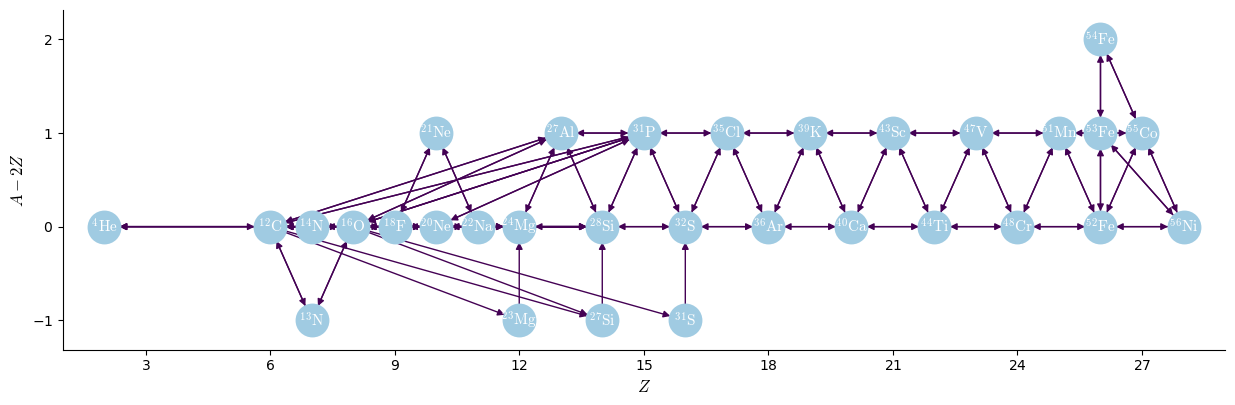

In [17]:
rc_orig = pyna.RateCollection(libraries=[subch_orig])
rc_orig.plot(rotated=True, hide_xalpha=True, size=(1500, 450), node_size=500, node_font_size=11)

## Look at actual rates

In [18]:
rho = 1.e6
T = 5.e8

comp = pyna.Composition(rc_orig.unique_nuclei)
comp.set_all(0.1)
comp.normalize()

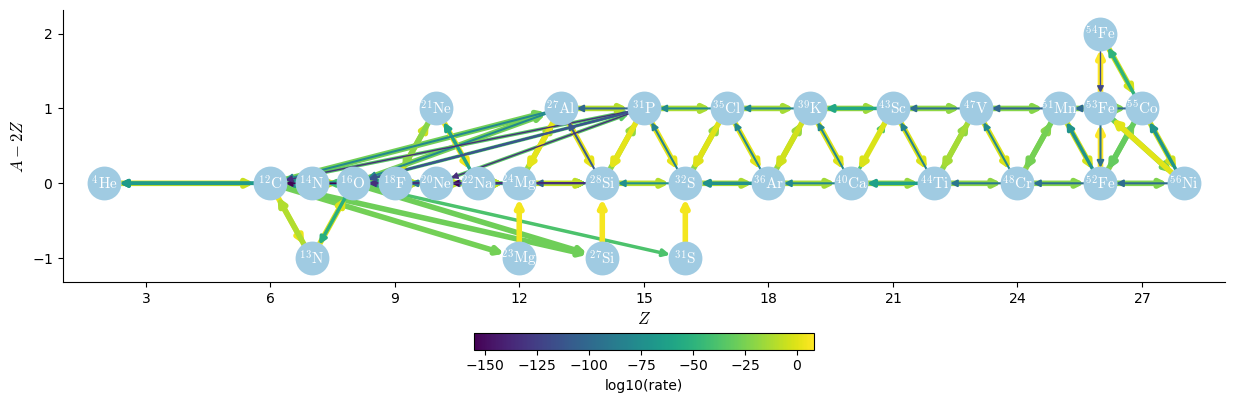

In [19]:
rc_orig.plot(rho=rho, T=T, comp=comp,
             rotated=True, hide_xalpha=True, size=(1500, 450), node_size=500, node_font_size=11)

In [20]:
ex = pyna.Explorer(rc_orig, comp, rotated=True, hide_xalpha=True, size=(1500, 450), node_size=500, node_font_size=11)

In [21]:
ex.explore(logrho=(5, 7, 0.1), logT=(7, 9.5, 0.1))

interactive(children=(FloatSlider(value=6.0, description='logrho', max=7.0, min=5.0), FloatSlider(value=8.2, d…